In [23]:
# Analysis:
#   D=1 -- computes diffusion coefficient
#   alpha=[dt1,dt2] - list of time steps dt1 and dt2 to build the profiles.
#   ptpx=1 -- computes the probability of being on the transition path.
#     Arguments --x0= , --x1=  and  --dx= should be specified
#     testoptimality=1 -- tests the optimality of the reaction coordinate.
#     Arguments --x0= and --x1= should be specified (x0<x1)

In [24]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [35]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)
# print(type(x))

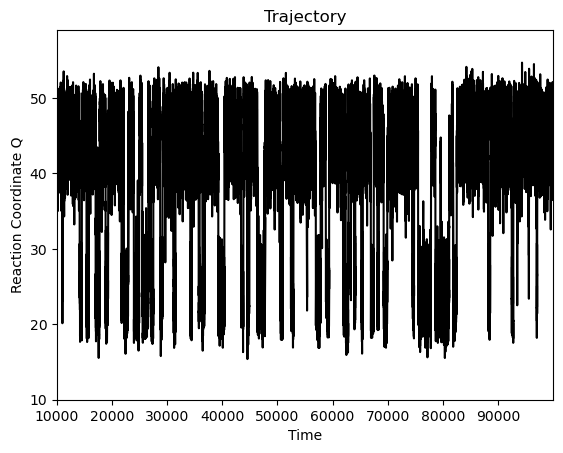

In [26]:
fig, ax = plt.subplots()
ax.plot(x, color= 'black') 
plt.xlabel('Time')
plt.ylabel('Reaction Coordinate Q')
plt.title('Trajectory')
plt.ylim([10, 59])
plt.xlim([10000, 99999])
plt.show()

In [27]:
# calculando histograma
hist, bins = np.histogram(x, bins=50, range=None, weights=None)  # 'bins' são os números que aparecem e 'hist' é quantidade de vezes que isso ocorre

# print(type(hist))
print(hist, bins)

# total =  np.stack((hist, bins), axis=-1)
# np.savetxt("test_np", test_np)

[   23   216  1165  4358 10883 20253 27865 31387 31054 29408 28871 28017
 21025 11082  5279  2860  1914  1570  1432  1616  2295  3945  7612 15778
 29452 47895 62162 69360 70757 72154 75466 78462 75065 60734 40189 19628
  6928  1598   214    26     1     0     0     0     0     0     0     0
     0     1] [14.59   15.5988 16.6076 17.6164 18.6252 19.634  20.6428 21.6516 22.6604
 23.6692 24.678  25.6868 26.6956 27.7044 28.7132 29.722  30.7308 31.7396
 32.7484 33.7572 34.766  35.7748 36.7836 37.7924 38.8012 39.81   40.8188
 41.8276 42.8364 43.8452 44.854  45.8628 46.8716 47.8804 48.8892 49.898
 50.9068 51.9156 52.9244 53.9332 54.942  55.9508 56.9596 57.9684 58.9772
 59.986  60.9948 62.0036 63.0124 64.0212 65.03  ]


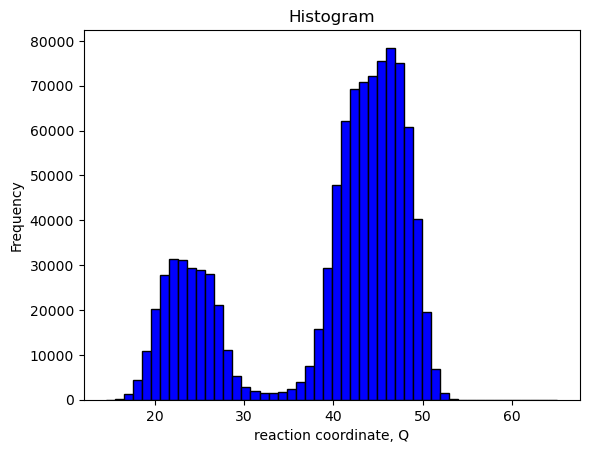

In [28]:
plt.hist(x, bins=50, color='blue', edgecolor='black')
plt.xlabel('reaction coordinate, Q')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [37]:
## Funcion, porém esta em python2

def compZh(x, dx, dt=1):
    zh = {}
    for val in x:
        val_int = int(val / dx) * dx # pegamos o valor inteiro da divisão coord x pelo intervalo dx e mult pelo intervalo dx 
        zh[val_int] = zh.get(val_int, 0) + 1
    
    for val in zh:
        zh[val] = float(zh[val]) / dt / dx
    
    return zh

def state(x, x0, x1, dx):
    zheq = compZh(x, dx)
    zhtp = {}
    
    def addZh(zh, ltpx):
        for val in ltpx:
            val_int = int(val / dx) * dx
            zh[val_int] = zh.get(val_int, 0) + 1
    
    s = 2  # estado inicial
    ltpx = []
    if x0 > x1:
        x0, x1 = x1, x0  # garante que x0 sempre seja menor que x1
    
    for val in x:
        ltpx.append(val)
        
        if s == 2:
            if val <= x0:
                s = 0
            if val >= x1:
                s = 1
        
        if val <= x0:
            if s == 1:
                addZh(zhtp, ltpx)
            s = 0
            ltpx = []
        
        if val >= x1:
            if s == 0:
                addZh(zhtp, ltpx)
            s = 1
            ltpx = []
    
    ptpx = []
    for val in zheq:
        ptpx.append((val, float(zhtp.get(val, 0)) / dx / zheq[val]))
    ptpx.sort()
    
    return ptpx


# Para testar a função
x0 = 30
x1 = 37
dx = 0.01
result = state(x, x0, x1, dx)
# print(result)

A função Compilação ZH calcula uma distribuição de probabilidade condicional. Ela recebe uma lista x, um valor dx e um valor de tempo dt (com um valor padrão de 1). Essa função itera sobre os valores em x, arredondando cada valor para o menor múltiplo de dx e então contabiliza a frequência desses valores em um dicionário zh. Posteriormente, divide esses valores pela quantidade total de tempo e pelo tamanho do intervalo dx para obter a distribuição de probabilidade. (A probabilidade de equilíbrio da coordenada de reação)

Já a função compptpx parece estar calculando o p(TP∣x). Ela recebe uma lista lx, um valor dx, dois valores de corte x0 e x1. A função organiza a lista lx em intervalos definidos por x0 e x1, contabiliza a frequência dos valores nesses intervalos e, em seguida, calcula a probabilidade condicional p(TP∣x) para cada intervalo. (A probabilidade de estar em um caminho de transição dado o valor de x)

In [22]:
def test(x,dx,x0,x1):
        
    b=3
    if x0>x1:x0,x1=x1,x0 # garatir que x0 sempre menor que x1
    
    if b==3:
        if x<=x0:b=0
        if x>=x1:b=1
    
    val1 = []
    val2 = []
            
    if x<=x0:
        b=0
        val1.append(x)
          
    if x>=x1:
        b=1
        val2.append(x)
        
    ptpx=[]
#     print(val1, val2)
#     return test
    for l in x:
        ptpx.append((l,float(zhtp.get(x,0))/dx/zheq[x]))
        ptpx.sort()
        
    return ptpx

# Para testar a função
# x0 = 30
# x1 = 37
# dx = 0.01
# result = test(bins, x0, x1, dx)
# print(result)

TypeError: '<=' not supported between instances of 'list' and 'float'